In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X = np.array([[1, 1, 1], [-1, 1, 1], [1, -1, 1], [1, 1, -1]])
T = np.array([1, -1, -1, -1])

In [3]:
def addBias(X):
    return np.insert(X, 0, 1, axis=1)

In [4]:
def activation(yin, theta):
    if theta < yin:
        return 1
    elif 0 <= yin <= theta:
        return 0
    else:
        return -1

In [5]:
def activation_mat(yin, theta):
    act = []
    for i in range(0, len(yin)):
        act.append(activation(yin[i], theta))
        
    return act

In [6]:
def getError(X, T, W, theta):
    tmp = (X * W).sum(axis=1)
    tmp = activation_mat(tmp, theta)
    tmp = (tmp != T).sum()
    return tmp

In [7]:
def train(X, T, W, epoch, learning_rate, theta):
    
    error = []
    for i in range(0, epoch):
        for j in range(0, len(X)):
            yin = (W * X[j]).sum()
            yout = activation(yin, theta)
            
            if yout != T[j]:
                W = W + learning_rate*T[j]*X[j]
        
        e = getError(X, T, W, theta)
        error.append(e)
        
        if e == 0:
            return W, error, ('Converged with epoch : ' + str(i))
        
    return W, error, 'Epoch reached limit : ' + str(epoch)

In [8]:
X = addBias(X)
W = np.zeros(X.shape[1])

In [9]:
theta = .2
learning_rate = 1
epoch = 10
W , error, message = train(X, T, W, epoch, learning_rate, theta)
print(message)
print(W)

Converged with epoch : 4
[-4.  2.  2.  2.]


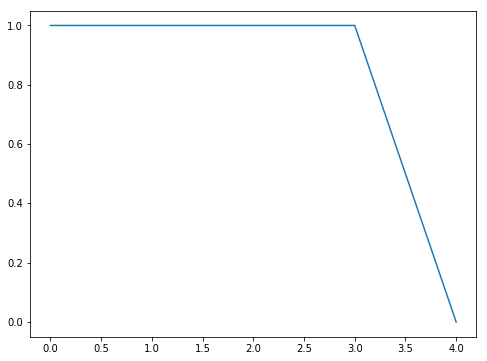

In [10]:
plt.figure(figsize=(8,6))
plt.plot(error)